In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from utils import model_assessment
from ipywidgets import interact

In [2]:
##
# Setup visualization settings:
#
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.handlelength'] = 2.0
minor_locator = AutoMinorLocator(4)

In [3]:
##
# Assess Accuracy, Precision, Recall, F1-score: 
#
results_VGG19 = [0.7463, 0.7563, 0.6164]
results_VGG19.append(model_assessment.compute_F1_score(results_VGG19[1], results_VGG19[2]))

results_ResNet152v2 =  [0.7015, 0.7402, 0.5839]
results_ResNet152v2.append(model_assessment.compute_F1_score(results_ResNet152v2[1], results_ResNet152v2[2]))

results_InceptionResNetv2 = [0.7313, 0.7417, 0.6871]
results_InceptionResNetv2.append(model_assessment.compute_F1_score(\
    results_InceptionResNetv2[1], results_InceptionResNetv2[2]))

results_NASNetLarge = [0.7672, 0.7263, 0.8415]
results_NASNetLarge.append(model_assessment.compute_F1_score(\
    results_NASNetLarge[1], results_NASNetLarge[2]))

results = [results_VGG19, results_ResNet152v2, results_InceptionResNetv2, results_NASNetLarge]

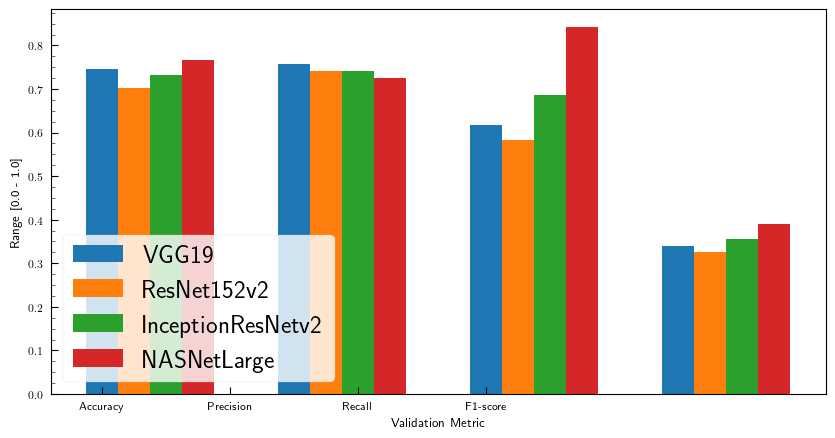

In [15]:
##
# Visualize Accuracy, Precision, Recall, F1-score: 
#
fig, axs = plt.subplots(1, 1, figsize = (10,5))
model_name = ['VGG19', 'ResNet152v2', 'InceptionResNetv2', 'NASNetLarge']
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i in range(4):
    width = 0.5
    xposition = [0.0 + i * width, 3.0 + i * width, 6.0 + i * width, 9.0 + i * width]
    rects = axs.bar(xposition, results[i], width, label = model_name[i])


xposition = [0.0, 3.0, 6.0, 9.0]
plt.xticks(xposition, labels)
axs.set_xlabel('Validation Metric')
axs.set_ylabel('Range [0.0 - 1.0]')
axs.yaxis.set_minor_locator(minor_locator)
axs.legend(model_name, loc = 'lower left')
plt.show()